In [ ]:
https://keras.io/api/losses/probabilistic_losses/

In [1]:
import numpy as np # algèbre linéaire
import pandas as pd # procès de données, CSV file I/O (e.g. pd.read_csv)

# import module time
from time import time

In [2]:
# vectorisation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# import de NLK
#import nltk

#import train_split
from  sklearn.model_selection import train_test_split

# learning models
from sklearn.linear_model import SGDClassifier

from keras.backend import clear_session

In [3]:
#import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [4]:
# Chargement des données qui seront utilisées.
data = pd.read_csv('text_emotion.csv')

In [5]:
data.head(5)

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [6]:
#encodage des données
# remplacer ['sadness' 'anger' 'love' 'surprise' 'fear' 'happy'..] par 1, 2,3, 4, 5
listEmotion = data["sentiment"].unique()
print(listEmotion)

data["sentiment"] = data["sentiment"].astype('category').cat.codes 

# Préparation des données
# preparation des targets
corpus = np.array(data["content"])
targets = np.array(data["sentiment"])

#la liste des émotions
listEmotion1 = data["sentiment"].unique()
listEmotion1

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


array([ 2, 10,  3,  8, 12, 11,  7,  4,  6,  5,  1,  9,  0], dtype=int8)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [8]:
cv = CountVectorizer()
X= cv.fit_transform(corpus)

In [9]:
words = cv.get_feature_names()

print(X.shape)
print("vocabulary size; %d" % len(words) )

(40000, 48212)
vocabulary size; 48212


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,targets, test_size =0.2, random_state=42)


In [11]:


def learning (X_train, X_test, y_train, y_test, mod) :
    #learn 
    start = time()
    mod.fit(X_train,y_train)
    T= time()-start
   
    #predict
    y_pred = model.predict(X_test)
    f1Score = f1_score(y_test, y_pred, average='weighted')
    return (T, f1Score)

In [12]:
model = SGDClassifier(max_iter=1000, tol=1e-3)

In [13]:
time, f1_score = learning (X_train, X_test, y_train, y_test, model)

In [14]:
time

2.537538528442383

In [15]:
 print("f1_score:", round(f1_score,4))

f1_score: 0.3054


In [16]:
score = model.score(X_train, y_train)
print("Accuracy train:", score)

score = model.score(X_test, y_test)
print("Accuracy test:", score)


Accuracy train: 0.8101875
Accuracy test: 0.327625


In [17]:

#print(classification_report(y_test, y_pred))

In [18]:
# Deep learnning
from tensorflow import keras

input_dim = X_train.shape[1]  # Number of features

In [19]:
input_dim

48212

In [20]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 26, activation = 'relu', input_dim=input_dim))

model.add(keras.layers.Dense(units = 13, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam",metrics=['accuracy'])




In [21]:
# Display the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 26)                1253538   
_________________________________________________________________
dense_1 (Dense)              (None, 13)                351       
Total params: 1,253,889
Trainable params: 1,253,889
Non-trainable params: 0
_________________________________________________________________


In [22]:
print(type(X_train))
print(y_train[:3])

<class 'scipy.sparse.csr.csr_matrix'>
[ 8  4 12]


In [23]:
#reordering the sparse matrice indices
X_train = X_train.sorted_indices()
X_test = X_test.sorted_indices()

print(type(X_test))
print(type(y_test))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>


In [24]:
# Training
#fit=model.fit(x_data, y_data, epochs=100, verbose=1)

history = model.fit(X_train, y_train,
                        epochs=25,
                        verbose=True,
                        validation_data=(X_test, y_test),
                        batch_size=1000)

Epoch 1/25
32/32 [==============================] - 3s 74ms/step - loss: 2.5084 - accuracy: 0.1850 - val_loss: 2.3319 - val_accuracy: 0.2733
Epoch 2/25
32/32 [==============================] - 1s 40ms/step - loss: 2.2490 - accuracy: 0.3516 - val_loss: 2.1781 - val_accuracy: 0.3010
Epoch 3/25
32/32 [==============================] - 1s 36ms/step - loss: 2.0746 - accuracy: 0.3834 - val_loss: 2.1034 - val_accuracy: 0.3211
Epoch 4/25
32/32 [==============================] - 1s 39ms/step - loss: 1.9433 - accuracy: 0.4384 - val_loss: 2.0440 - val_accuracy: 0.3389
Epoch 5/25
32/32 [==============================] - 2s 45ms/step - loss: 1.8095 - accuracy: 0.4897 - val_loss: 1.9986 - val_accuracy: 0.3479
Epoch 6/25
32/32 [==============================] - 2s 50ms/step - loss: 1.6629 - accuracy: 0.5335 - val_loss: 1.9678 - val_accuracy: 0.3496
Epoch 7/25
32/32 [==============================] - 2s 50ms/step - loss: 1.5234 - accuracy: 0.5728 - val_loss: 1.9501 - val_accuracy: 0.3543
Epoch 8/25
32

Si on réexecute la méthode fit(), on démarre avec les poids calculés lors de la formation précédente.C'est pour cette raison, qu'on appelle clear_session() avant de recommencer à former le modèle.
On  utilise la méthode .evaluate() pour mesurer la précision du modèle.


In [25]:
from keras.backend import clear_session
clear_session()

In [26]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))


1000/1000 [==============================] - 5s 5ms/step - loss: 0.3836 - accuracy: 0.9151
Training Accuracy: 0.9151
250/250 [==============================] - 1s 4ms/step - loss: 2.3356 - accuracy: 0.3099
Testing Accuracy:  0.3099


In [27]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [29]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


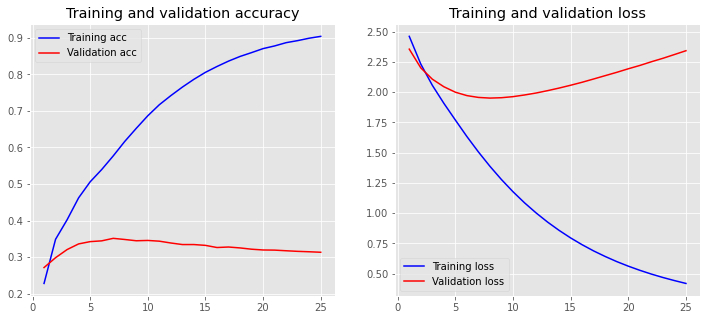

In [29]:
plot_history(history)

In [30]:
# Create the model 
clear_session()
model = keras.Sequential()
model.add(keras.layers.Dense(units = 64, activation = 'relu', input_dim=input_dim))

model.add(keras.layers.Dense(units = 64, activation = 'relu'))

model.add(keras.layers.Dense(units = 13, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam",metrics=['accuracy'])


In [31]:
# Display the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3085632   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 13)                845       
Total params: 3,090,637
Trainable params: 3,090,637
Non-trainable params: 0
_________________________________________________________________


In [32]:
#from keras.backend import clear_session
#clear_session()
# Training
#fit=model.fit(x_data, y_data, epochs=100, verbose=1)

history = model.fit(X_train, y_train,
                        epochs=3,
                        verbose=True,
                        validation_data=(X_test, y_test),
                        batch_size=1000)

Epoch 1/3
32/32 [==============================] - 3s 78ms/step - loss: 2.4973 - accuracy: 0.2094 - val_loss: 2.2041 - val_accuracy: 0.2661
Epoch 2/3
32/32 [==============================] - 2s 71ms/step - loss: 2.0966 - accuracy: 0.3397 - val_loss: 2.0349 - val_accuracy: 0.3274
Epoch 3/3
32/32 [==============================] - 2s 74ms/step - loss: 1.7944 - accuracy: 0.4519 - val_loss: 1.9546 - val_accuracy: 0.3454


In [33]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

1000/1000 [==============================] - 6s 5ms/step - loss: 1.5467 - accuracy: 0.5279
Training Accuracy: 0.5279
250/250 [==============================] - 2s 6ms/step - loss: 1.9546 - accuracy: 0.3454
Testing Accuracy:  0.3454


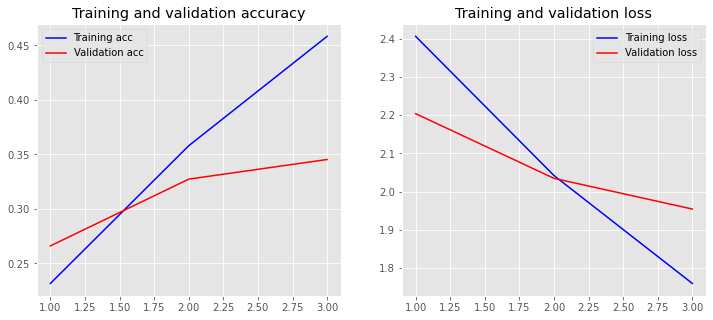

In [34]:
plot_history(history)

In [35]:
# Create the model 
clear_session()

model = keras.Sequential()
model.add(keras.layers.Dense(units = 26, activation = 'relu', input_dim=input_dim))

#model.add(keras.layers.Dense(units = 64, activation = 'relu'))

model.add(keras.layers.Dense(units = 13, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam",metrics=['accuracy'])


In [36]:

history = model.fit(X_train, y_train,
                        epochs=3,
                        verbose=True,
                        validation_data=(X_test, y_test),
                        batch_size=1000)


Epoch 1/3
32/32 [==============================] - 2s 51ms/step - loss: 2.5131 - accuracy: 0.1977 - val_loss: 2.3490 - val_accuracy: 0.2484
Epoch 2/3
32/32 [==============================] - 2s 45ms/step - loss: 2.2627 - accuracy: 0.2819 - val_loss: 2.1934 - val_accuracy: 0.2941
Epoch 3/3
32/32 [==============================] - 2s 42ms/step - loss: 2.0765 - accuracy: 0.3954 - val_loss: 2.1116 - val_accuracy: 0.3274


In [37]:
# Display the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 26)                1253538   
_________________________________________________________________
dense_1 (Dense)              (None, 13)                351       
Total params: 1,253,889
Trainable params: 1,253,889
Non-trainable params: 0
_________________________________________________________________


In [38]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))

1000/1000 [==============================] - 7s 7ms/step - loss: 1.9643 - accuracy: 0.4538
Training Accuracy: 0.4538
250/250 [==============================] - 2s 6ms/step - loss: 2.1116 - accuracy: 0.3274
Testing Accuracy:  0.3274


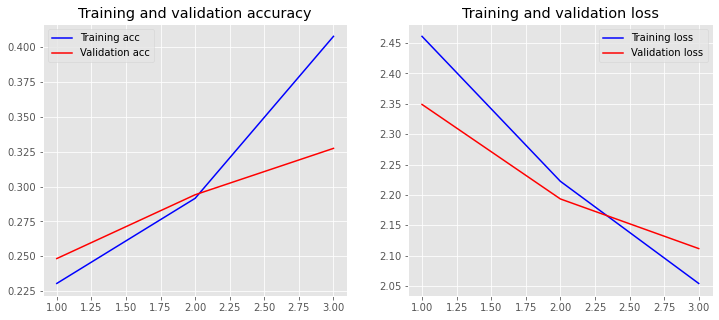

In [39]:
plot_history(history)

In [40]:
y_pred = model.predict(X_test,verbose = 1)

250/250 [==============================] - 2s 6ms/step


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.argmax(1), target_names = listEmotion))

              precision    recall  f1-score   support

       empty       0.00      0.00      0.00        19
     sadness       0.00      0.00      0.00        31
  enthusiasm       0.00      0.00      0.00       162
     neutral       0.00      0.00      0.00       163
       worry       0.00      0.00      0.00       338
    surprise       0.35      0.29      0.31      1028
        love       0.00      0.00      0.00       268
         fun       0.51      0.31      0.39       762
        hate       0.34      0.47      0.39      1740
   happiness       0.00      0.00      0.00       352
     boredom       0.45      0.09      0.16      1046
      relief       0.00      0.00      0.00       425
       anger       0.29      0.70      0.41      1666

    accuracy                           0.33      8000
   macro avg       0.15      0.14      0.13      8000
weighted avg       0.29      0.33      0.27      8000



/home/sacia/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
listEmotion1

array([ 2, 10,  3,  8, 12, 11,  7,  4,  6,  5,  1,  9,  0], dtype=int8)

#### What Is a Word Embedding?
Le texte est considéré comme une forme de données séquentielles similaires aux données de séries temporelles.
On a représenté une séquence entière de mots comme un seul vecteur de caractéristiques.

Maintenant, On représente chaque mot sous forme de vecteurs. Deux façons possibles de le faire sont one-hot encoding and word embeddings.

One-hot encoding se fait en prenant un vecteur de la longueur du vocabulaire avec une entrée pour chaque mot du corpus.

In [43]:
cities = ['London', 'Berlin', 'Berlin', 'New York', 'London']
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
city_labels = encoder.fit_transform(cities)
city_labels

array([1, 0, 0, 2, 1])

 ##### OneHotEncoder
 On  peut utiliser le OneHotEncoder fourni par scikit-learn pour encoder les valeurs catégorielles que nous avons obtenues précédemment dans un tableau numérique encodé à un coup. OneHotEncoder s'attend à ce que chaque valeur catégorielle soit dans une ligne séparée, donc vous devrez remodeler le tableau, puis vous pourrez appliquer l'encodeur.
Cette manière de faire est surtout utilisé pour les catégories. Ces catégories peuvent être par exemple la ville, le département ou d'autres catégories.

In [44]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
city_labels = city_labels.reshape((5, 1))
encoder.fit_transform(city_labels)

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

##### Word Embeddings

Cette méthode représente les mots sous forme de vecteurs de mots denses (également appelés "word embeddings"). Cela signifie que les 'Embeddings' de mots rassemblent plus d'informations dans moins de dimensions.
l'objectif est de représenter la signification sémantique dans un espace géométrique, appellé embedding space.
L'embedding prend en compte la relation entre les mots, ainsi des choses comme l'arithmétique vectorielle devraient devenir possibles. Un exemple célèbre dans ce domaine:  King - Man + Woman = Queen 
deux options pour faire pour mettre en place l'embedding : 
- Les former pendant la formation du réseau neuronal. 
- L'autre possibilité consiste à utiliser des 'Embeddings' de mots pré-formés qu on peut directement utiliser dans le modèle.
On commence par tokeniser les données dans un format qui peut être utilisé par les Embeddings de mots. Keras propose quelques méthodes pratiques pour   preprocessing and sequence preprocessing

In [45]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=50000)

sentences_train, sentences_test, y_train, y_test = train_test_split(corpus,targets, test_size =0.2, random_state=42)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1 


print(sentences_train[2])
print(X_train[2])

Playing some games before I leave for work   Work til at least 11PM tonight.
[377, 73, 1323, 227, 1, 349, 11, 43, 43, 602, 24, 358, 6401, 118]


In [46]:
vocab_size

42030

L'indexation est ordonnée d'après les mots les plus courants du texte, ce que vous pouvez voir par le mot le ayant l'index 1 : "I"
Les mots inconnus (mots qui ne font pas partie du vocabulaire) sont désignés dans Keras par word_count + 1 car ils peuvent également contenir des informations.

In [47]:
for word in ['i', 'all', 'happy', 'sad']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

i: 1
all: 30
happy: 49
sad: 114


#### La différence 
Avec CountVectorizer, nous avions des vecteurs empilés de comptes de mots, et chaque vecteur était de la même longueur (la taille du vocabulaire total du corpus). 
Avec Tokenizer, les vecteurs résultants sont égaux à la longueur de chaque texte, et les nombres n'indiquent pas le nombre de mots, mais correspondent plutôt aux valeurs des mots du dictionnaire "tokenizer.word_index."
Un problème  rencontré est que chaque séquence de texte a, dans la plupart des cas, une longueur de mots différente. Pour y remédier, on peut utiliser pad_sequence() qui ajoute simplement des zéros à la séquence de mots.
On peut ajouter un paramètre maxlen pour spécifier la longueur des séquences. Cela coupe les séquences qui dépassent ce nombre. 

In [48]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [49]:
 print(X_train[0, :])

[12997   881  2206  5306  1262     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


#### Embedding Layer
on peut utiliser la couche Embedding de Keras qui prend les entiers calculés précédemment et les transforme en un vecteur dense Embedding. on aura besoin des paramètres suivants :

    input_dim: the size of the vocabulary
    output_dim: the size of the dense vector
    input_length: the length of the sequence



In [50]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

clear_session()
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(26, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           2101500   
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense (Dense)                (None, 26)                130026    
_________________________________________________________________
dense_1 (Dense)              (None, 13)                351       
Total params: 2,231,877
Trainable params: 2,231,877
Non-trainable params: 0
_________________________________________________________________


Nous avons  2101500   params à entrainer.
Ce nombre provient de vocab_size multiplié par embedding_dim. Ces poids de la couche d'embedding sont initialisés avec des poids aléatoires et sont ensuite ajustés par rétropropagation pendant l'apprentissage. Ce modèle prend les mots comme ils viennent dans l'ordre des phrases comme vecteurs d'entrée. 

Epoch 1/5
32/32 [==============================] - 5s 123ms/step - loss: 2.3968 - accuracy: 0.1949 - val_loss: 2.1903 - val_accuracy: 0.2551
Epoch 2/5
32/32 [==============================] - 4s 119ms/step - loss: 2.1589 - accuracy: 0.2596 - val_loss: 2.1197 - val_accuracy: 0.2621
Epoch 3/5
32/32 [==============================] - 4s 113ms/step - loss: 2.0713 - accuracy: 0.2812 - val_loss: 2.0635 - val_accuracy: 0.2965
Epoch 4/5
32/32 [==============================] - 4s 116ms/step - loss: 1.9797 - accuracy: 0.3364 - val_loss: 2.0134 - val_accuracy: 0.3069
Epoch 5/5
1000/1000 [==============================] - 24s 24ms/step - loss: 1.7250 - accuracy: 0.4631
Training Accuracy: 0.4631
250/250 [==============================] - 6s 25ms/step - loss: 1.9795 - accuracy: 0.3206
Testing Accuracy:  0.3206


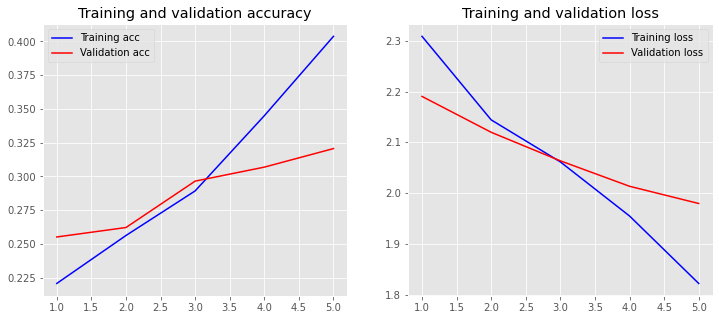

In [51]:

history = model.fit(X_train, y_train,
                    epochs=5,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=1000)

loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


In [52]:
def predEmotion (model, text):
    
    dict_emotion = dict((k,v) for k, v in zip(listEmotion1,listEmotion))
    X_test = tokenizer.texts_to_sequences([text])
    print("tokenizer.texts ", X_test )
    X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
    print("pad_sequences ", X_test )
    y_pred = model.predict(X_test,verbose = 1)
    
    print(y_pred)
    maxL = np.argmax(y_pred)
    print(maxL )
  
    return ( dict_emotion[maxL])

In [53]:
y = predEmotion (model, "Happy Mothers Day  All my love")
y

tokenizer.texts  [[49, 142, 21, 30, 5, 45]]
pad_sequences  [[ 49 142  21  30   5  45   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]]
1/1 [==============================] - 0s 135ms/step
[[2.8006855e-04 1.5006632e-03 1.4627909e-02 1.2928120e-02 1.4043971e-02
  1.1968501e-01 9.4507186e-04 5.3644449e-01 1.6618861e-02 9.7550727e-02
  1.7587775e-02 6.8067729e-02 9.9719547e-02]]
7


'love'

Lorsqu'on travaille avec des données séquentielles, il est  préférable de privilégier les méthodes qui prennent en compte les informations locales et séquentielles plutôt que les informations de position absolue.
Une autre manière de faire est d'utiliser une couche MaxPooling1D/AveragePooling1D aprés une couche d'embedding (a way to reduce the size of)

Dans le cas du MaxPooling1D, on prend la valeur maximale de toutes les caractéristiques du pool pour chaque dimension de caractéristique.
Dans le cas du AveragePooling1D, on prend la moyenne, mais le pooling max semble être plus couramment utilisé car il met en évidence les grandes valeurs.


In [54]:
#from keras.models import Sequential
#from keras import layers

embedding_dim = 50
clear_session()
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(26, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           2101500   
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 26)                1326      
_________________________________________________________________
dense_1 (Dense)              (None, 13)                351       
Total params: 2,103,177
Trainable params: 2,103,177
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
32/32 [==============================] - 5s 141ms/step - loss: 2.5179 - accuracy: 0.1795 - val_loss: 2.3787 - val_accuracy: 0.2410
Epoch 2/5
32/32 [==============================] - 5s 144ms/step - loss: 2.3176 - accuracy: 0.2449 - val_loss: 2.2072 - val_accuracy: 0.2292
Epoch 3/5
32/32 [==============================] - 5s 146ms/step - loss: 2.1851 - accuracy: 0.2602 - val_loss: 2.1609 - val_accuracy: 0.2679
Epoch 4/5
32/32 [==============================] - 4s 140ms/step - loss: 2.1304 - accuracy: 0.2964 - val_loss: 2.1266 - val_accuracy: 0.2800
Epoch 5/5
1000/1000 [==============================] - 10s 10ms/step - loss: 2.0387 - accuracy: 0.3407
Training Accuracy: 0.3407
250/250 [==============================] - 2s 8ms/step - loss: 2.0849 - accuracy: 0.2954
Testing Accuracy:  0.2954


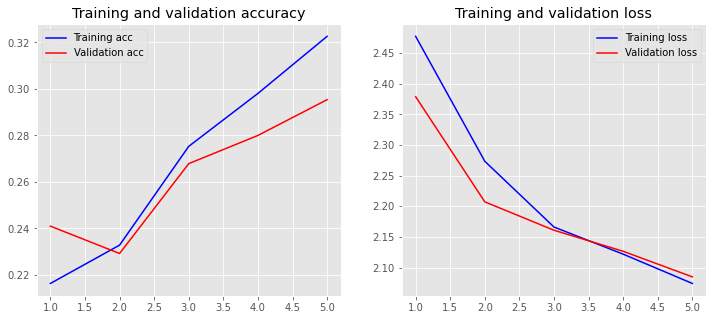

In [55]:
clear_session()
history = model.fit(X_train, y_train,
                    epochs=5,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=1000)
loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


In [56]:
vocab_size

42030

In [57]:
from numpy import array
from keras.preprocessing import text
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.callbacks import LambdaCallback 

In [58]:
# tokenize documents
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(corpus)
word2idx = tokenizer.word_index
print('length of word2idx = ',len(word2idx))
#print(word2idx)

length of word2idx =  48997


In [60]:
# integer encode the documents
encoded_docs = [[word2idx[w] for w in text.text_to_word_sequence(doc)] for doc in corpus]
#print(encoded_docs)

In [61]:
longest_list = max(len(elem) for elem in encoded_docs)
print(longest_list)

37


In [62]:
# pad documents to a max length of 4 words
max_length = 37

padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
#print(padded_docs)

In [63]:
embedding_dim = 50
# define the model
clear_session()
model = Sequential()
model.add(Embedding(vocab_size, output_dim=embedding_dim, input_length=max_length ))
model.add(Flatten())
model.add(Dense(13, activation='softmax'))


# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 37, 50)            2101500   
_________________________________________________________________
flatten (Flatten)            (None, 1850)              0         
_________________________________________________________________
dense (Dense)                (None, 13)                24063     
Total params: 2,125,563
Trainable params: 2,125,563
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
#clear_session()    
# fit the model
#model.fit(padded_docs, targets, epochs=5, verbose=True )
# evaluate the model
#loss, accuracy = model.evaluate(padded_docs, targets, verbose=1)
#print('Accuracy: %f' % (accuracy*100))


####  Using Pretrained Word Embeddings

Il est possible d'utiliser un embedding précalculer en utilsant un corpus de test plus large; en les entraînant simplement sur un grand corpus de texte. Parmi les méthodes les plus populaires figurent Word2Vec, développé par Google, et GloVe (Global Vectors for Word Representation), développé par le Stanford NLP Group.
il s'agit de différentes approches ayant le même objectif. Word2Vec y parvient en utilisant des réseaux neuronaux et GloVe y parvient avec une matrice de cooccurrence et en utilisant la factorisation matricielle. Dans les deux cas, il s'agit de réduire la dimensionnalité, mais Word2Vec est plus précis et GloVe est plus rapide à calculer.


In [67]:
len(tokenizer.word_index)

48997

In [68]:

import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    print("vocab_size :", vocab_size)
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix


In [71]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('glove.6B/glove.6B.50d.txt',
okenizer.word_index, embedding_dim)

In [636]:
embedding_matrix 

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.11891   ,  0.15255   , -0.082073  , ..., -0.57511997,
        -0.26671001,  0.92120999],
       [ 0.68046999, -0.039263  ,  0.30186   , ..., -0.073297  ,
        -0.064699  , -0.26043999],
       ...,
       [ 1.18879998,  1.46720004, -0.99624002, ...,  0.48704001,
         0.77978998,  0.38242999],
       [ 0.013849  , -0.54549998, -0.077683  , ...,  0.67878002,
         0.46202999,  0.72376001],
       [ 0.023778  , -0.80124003,  0.1193    , ..., -1.06830001,
        -0.35703   ,  0.21013001]])

First, let’s have a quick look how many of the embedding vectors are nonzero:

In [659]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.45869219151802115

In [666]:
clear_session()
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           2449900   
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               5100      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 13)                1313      
Total params: 2,456,313
Trainable params: 2,456,313
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25
32/32 [==============================] - 3s 85ms/step - loss: 2.5094 - accuracy: 0.1572 - val_loss: 2.1902 - val_accuracy: 0.2384
Epoch 2/25
32/32 [==============================] - 2s 76ms/step - loss: 2.2408 - accuracy: 0.2103 - val_loss: 2.1678 - val_accuracy: 0.2428
Epoch 3/25
32/32 [==============================] - 2s 78ms/step - loss: 2.1952 - accuracy: 0.2192 - val_loss: 2.1562 - val_accuracy: 0.2466
Epoch 4/25
32/32 [==============================] - 2s 78ms/step - loss: 2.1741 - accuracy: 0.2325 - val_loss: 2.1495 - val_accuracy: 0.2528
Epoch 5/25
32/32 [==============================] - 3s 81ms/step - loss: 2.1646 - accuracy: 0.2317 - val_loss: 2.1414 - val_accuracy: 0.2542
Epoch 6/25
32/32 [==============================] - 3s 79ms/step - loss: 2.1486 - accuracy: 0.2388 - val_loss: 2.1376 - val_accuracy: 0.2559
Epoch 7/25
32/32 [==============================] - 3s 78ms/step - loss: 2.1424 - accuracy: 0.2440 - val_loss: 2.1316 - val_accuracy: 0.2535
Epoch 8/25
32

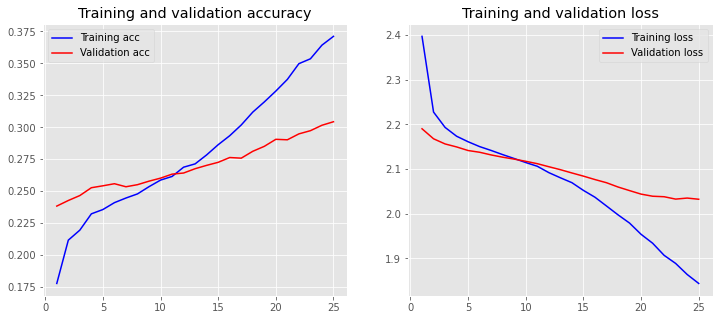

In [667]:

history = model.fit(X_train, y_train,
                    epochs=25,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=1000)
loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


In [673]:
model = Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
#model.add(keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
#model.add(keras.layers.LSTM(32))
#model.add(keras.layers.GlobalMaxPool1D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200, activation='relu'))
#model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           2449900   
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               1000200   
_________________________________________________________________
dense_8 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_9 (Dense)              (None, 13)                1313      
Total params: 3,471,513
Trainable params: 3,471,513
Non-trainable params: 0
_________________________________________________________________


Epoch 1/3
32/32 [==============================] - 6s 168ms/step - loss: 2.2487 - accuracy: 0.2172 - val_loss: 2.1259 - val_accuracy: 0.2595
Epoch 2/3
32/32 [==============================] - 5s 152ms/step - loss: 2.0765 - accuracy: 0.2719 - val_loss: 2.1180 - val_accuracy: 0.2542
Epoch 3/3
1000/1000 [==============================] - 9s 9ms/step - loss: 1.9267 - accuracy: 0.3396
Training Accuracy: 0.3396
250/250 [==============================] - 3s 12ms/step - loss: 2.1188 - accuracy: 0.2693
Testing Accuracy:  0.2693


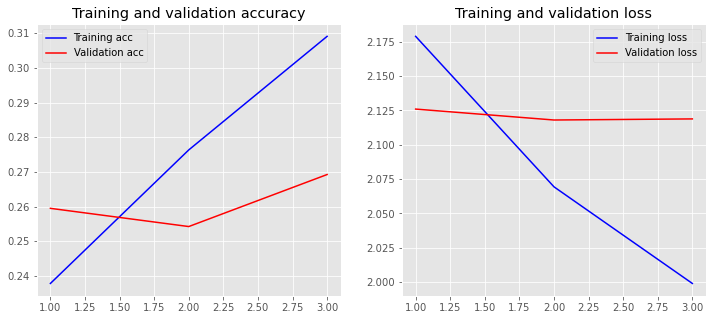

In [674]:
history = model.fit(X_train, y_train,
                    epochs=3,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=1000)
loss, accuracy = model.evaluate(X_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


#### Convolutional Neural Networks (CNN)
 un CNN est un réseau neuronal spécialisé capable de détecter des modèles spécifiques.
Utilisés prinicipalement la classification des images et la vision par ordinateur en permettant d'extraire des caractéristiques des images et de les utiliser dans des réseaux neuronaux.


In [353]:
embedding_dim = 100

model = Sequential()
# cnn
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())

# dense
model.add(layers.Dense(26, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          4203000   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
_________________________________________________________________
dense_3 (Dense)              (None, 13)                351       
Total params: 4,270,833
Trainable params: 4,270,833
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.6888
Testing Accuracy:  0.3334


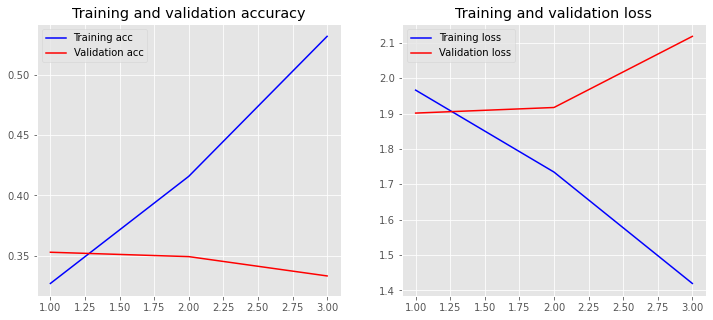

In [354]:
clear_session()
history = model.fit(X_train, y_train,
                    epochs=3,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


l'accuracy enregistre un plateau qui ne depasse pas les 35 %  et commence à baiser à patir de la deuxieme itération.

Les CNN fonctionnent mieux avec de grands ensembles d'apprentissage où ils sont capables de trouver des généralisations là où un modèle simple comme la régression logistique ne le pourrait pas.
